In [1]:
library('Seurat')

In [2]:
donor1_scrna <- Read10X_h5('~/Downloads/vdj_v1_hs_aggregated_donor1_filtered_feature_bc_matrix.h5')
names(donor1_scrna)

Genome matrix has multiple modalities, returning a list of matrices for this genome


[1] "Gene Expression"  "Antibody Capture"

In [3]:
donor1 <-
    CreateSeuratObject(
        counts=donor1_scrna$`Gene Expression`,
        project="donor1",
        min.cells=3,
        min.features=200
    )
donor1

An object of class Seurat 
20079 features across 55187 samples within 1 assay 
Active assay: RNA (20079 features)

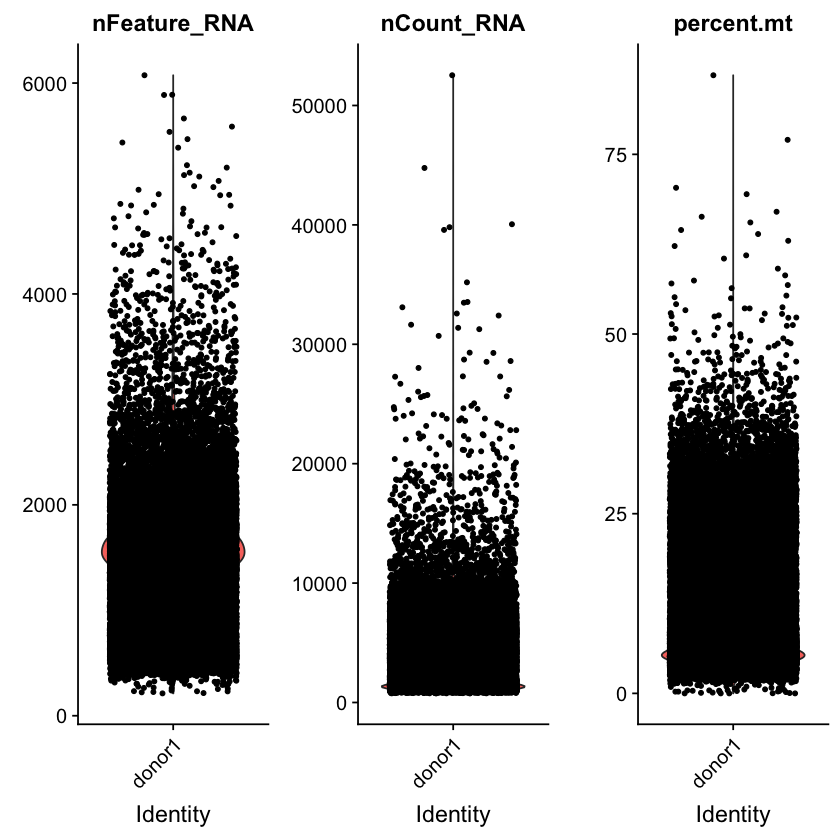

In [4]:
donor1[["percent.mt"]] <- PercentageFeatureSet(donor1, pattern = "^MT-")

VlnPlot(donor1, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)

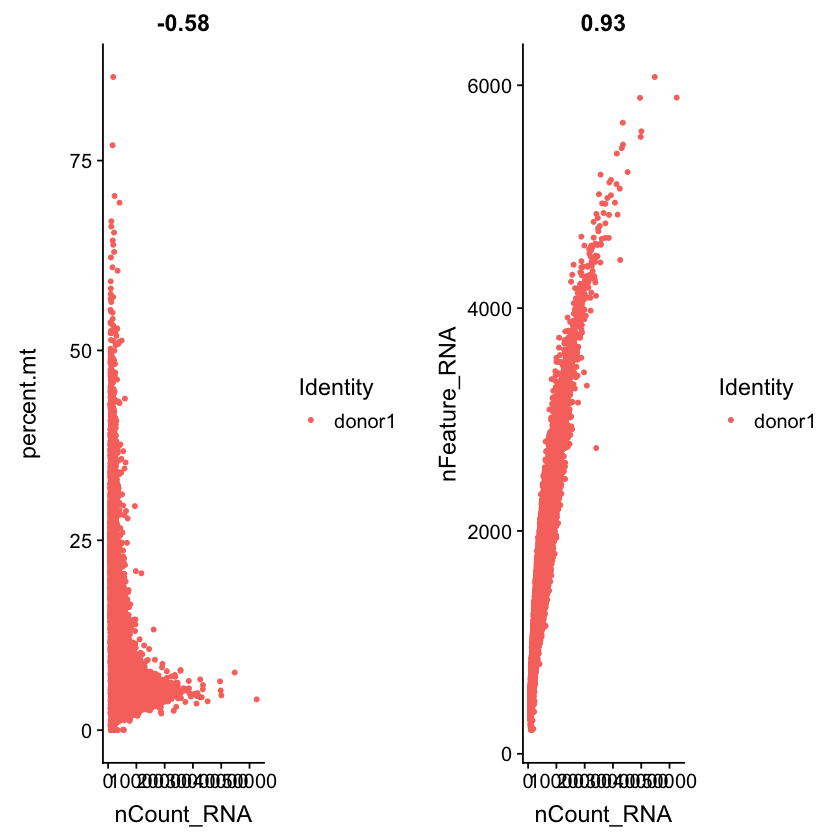

In [5]:
plot1 <- FeatureScatter(donor1, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(donor1, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [6]:
donor1 <- subset(donor1, subset = nFeature_RNA > 200 & nFeature_RNA < 4000 & percent.mt < 15)


In [7]:

donor1 <- NormalizeData(donor1)

When using repel, set xnudge and ynudge to 0 for optimal results
Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”

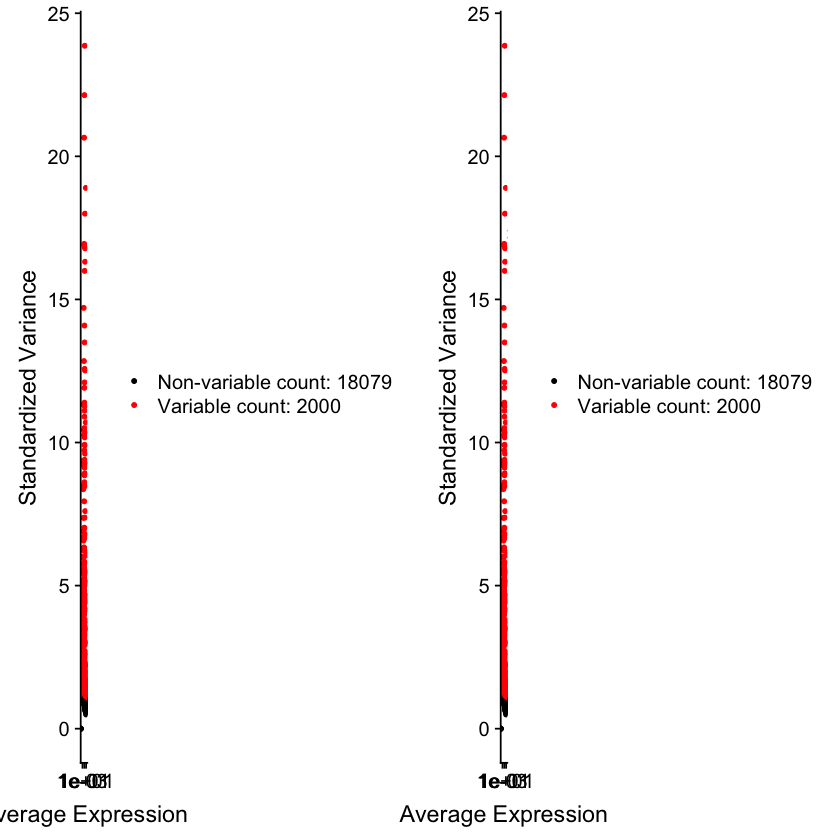

In [8]:
donor1 <- FindVariableFeatures(donor1, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(donor1), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(donor1)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))

Centering and scaling data matrix


PC_ 1 
Positive:  LEF1, CCR7, RPL32, RPS13, RPS3A, LTB, EEF1B2, RPS12, RPL22, RPS8 
	   RPL13, RPS5, ACTN1, RPS6, NOSIP, RPL9, TCF7, TPT1, MAL, RPL10A 
	   AIF1, LDHB, RPS18, RPL37, RPLP1, RPS2, RPS9, RPL4, RPL7, IL7R 
Negative:  NKG7, CCL5, CST7, GZMA, CD99, GZMH, PRF1, SRGN, AHNAK, CLIC1 
	   PLEK, MYO1F, ITGB2, ZEB2, KLF6, CCL4, FGFBP2, ANXA1, HLA-DRB1, ADGRG1 
	   FLNA, CD74, HLA-DPA1, APOBEC3G, PYHIN1, GZMK, SLC9A3R1, CYTOR, FCGR3A, HLA-DPB1 
PC_ 2 
Positive:  MTRNR2L12, FOSB, TNFAIP3, NR4A2, SLC2A3, IFRD1, CD69, FOS, CXCR4, AC016831.7 
	   IL7R, JUN, TSPYL2, ZNF331, HSPA5, MACF1, CCNH, BTG2, PDE3B, SLC7A5 
	   RGCC, NFKBIZ, ITGA4, ZFP36L2, CEMIP2, CBLB, PIK3R1, NEAT1, KLF6, NR4A3 
Negative:  TMSB10, TMSB4X, RPL37, RPL21, RPS18, RPS12, RPLP1, RPL32, RPS3A, RPSA 
	   RPL13, PFN1, RPS8, RPS2, RPS6, TPT1, RPS5, RPS13, SH3BGRL3, RPL10A 
	   RPL9, PPIA, RPL22, RPS9, ACTB, CFL1, ACTG1, RPL7, RPLP0, RPS29 
PC_ 3 
Positive:  ZNF683, KLRD1, KLRC3, GNLY, NCR3, DUSP1, KLRC2, IFITM2, FOS, S10

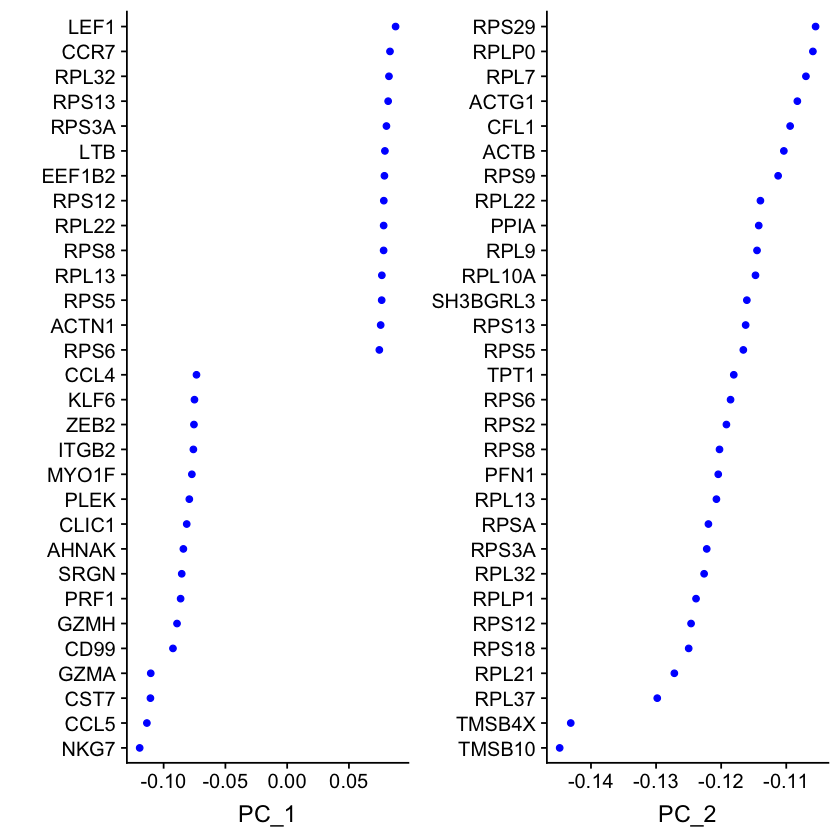

In [9]:
all.genes <- rownames(donor1)
donor1 <- ScaleData(donor1, features = all.genes)
donor1 <- RunPCA(donor1, features = VariableFeatures(object = donor1))
VizDimLoadings(donor1, dims = 1:2, reduction = "pca")

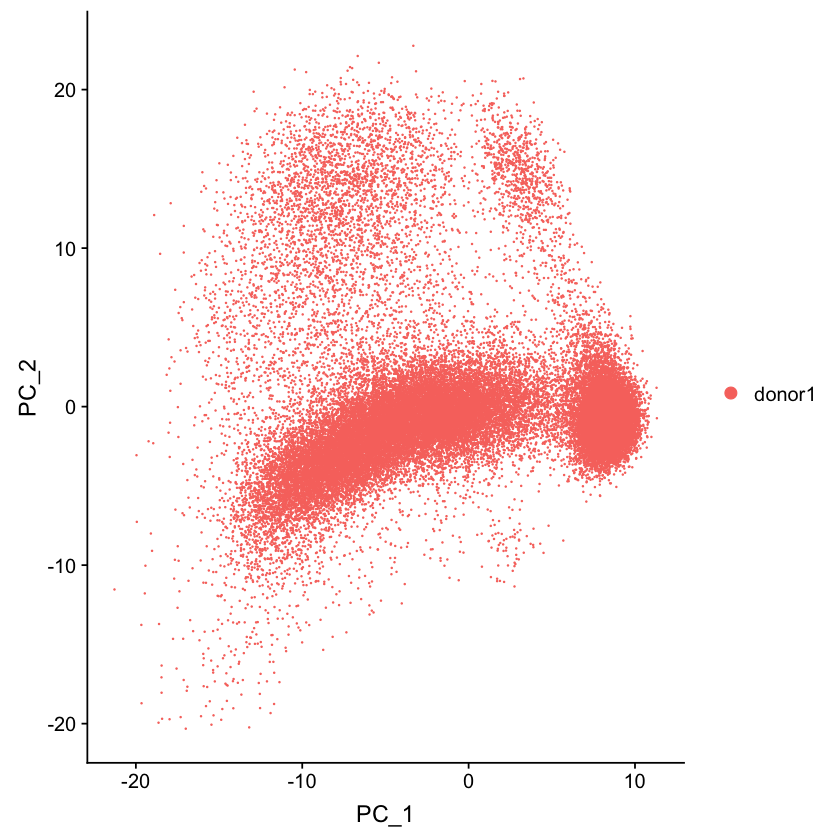

In [10]:
DimPlot(donor1, reduction = "pca")

Warning message:
“Removed 21000 rows containing missing values (geom_point).”

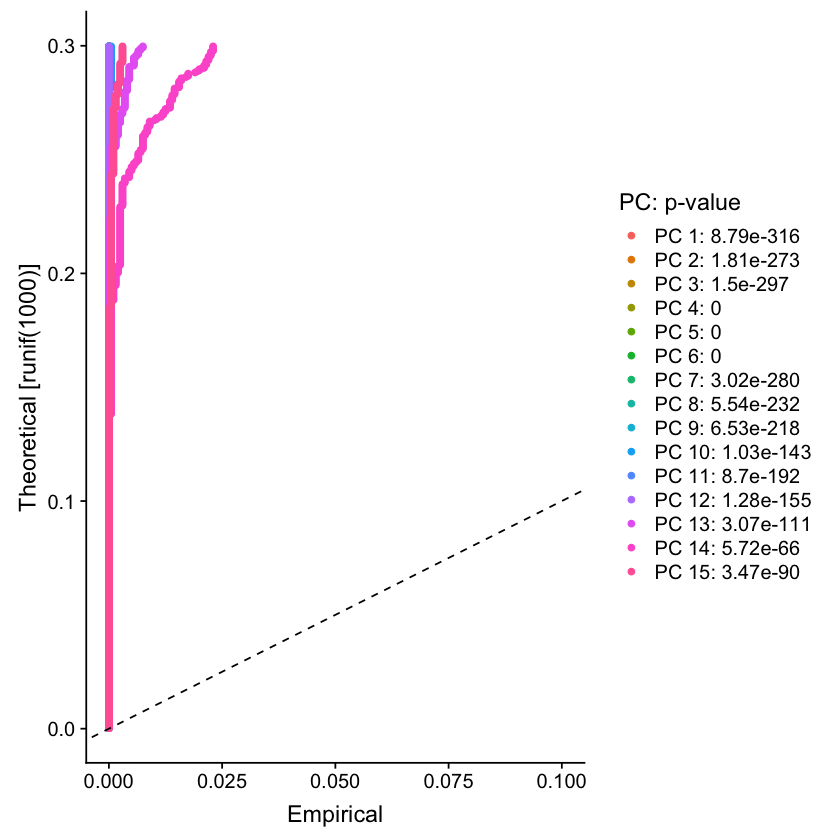

In [11]:
donor1 <- JackStraw(donor1, num.replicate = 100)
donor1 <- ScoreJackStraw(donor1, dims = 1:20)
JackStrawPlot(donor1, dims = 1:15)


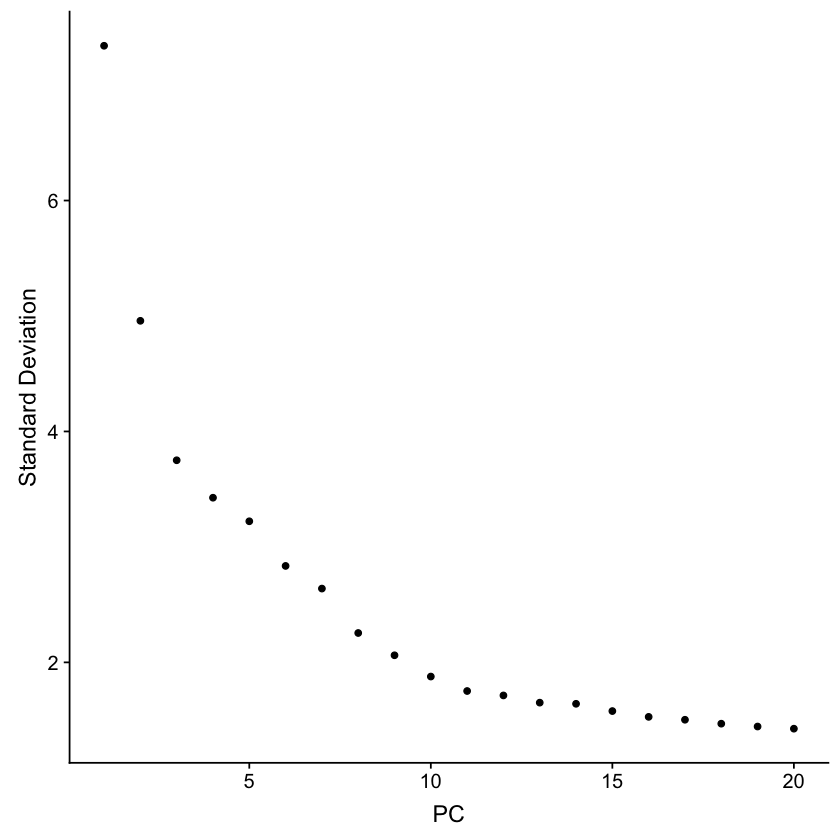

In [12]:
ElbowPlot(donor1)


In [14]:
donor1 <- FindNeighbors(donor1, dims = 1:10)
donor1 <- FindClusters(donor1, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 42980
Number of edges: 1260497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8980
Number of communities: 12
Elapsed time: 57 seconds


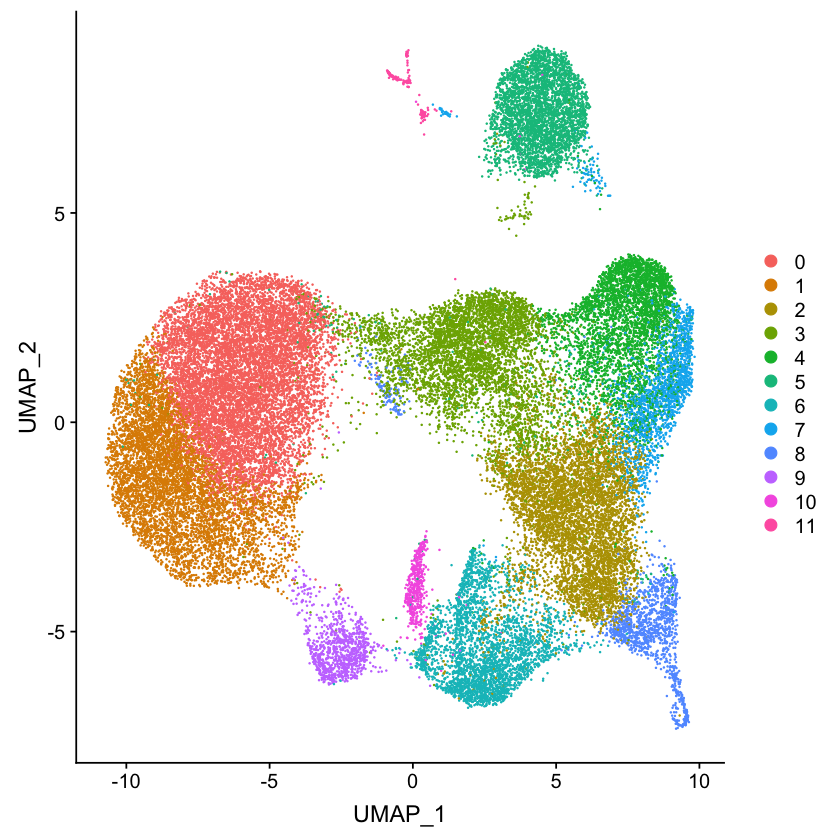

In [15]:
donor1 <- RunUMAP(donor1, dims = 1:10)
DimPlot(donor1, reduction = "umap")

In [17]:
cluster1.markers <- FindMarkers(donor1, ident.1 = 1, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
AIF1,0,0.6187682,0.602,0.249,0
LEF1,0,0.5867154,0.858,0.475,0
RPS13,0,0.5571959,1.000,0.967,0
LINC02446,0,0.5446096,0.642,0.363,0
RPL32,0,0.5412317,1.000,0.976,0


In [18]:
cluster1.markers <- FindMarkers(donor1, ident.1 = 11, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
CST3,0,2.543341,0.647,0.033,0
FAM30A,0,1.267474,0.534,0.007,0
TNFRSF18,0,1.124785,0.373,0.012,0
CAPG,0,1.105076,0.627,0.037,0
PRSS57,0,1.051138,0.422,0.002,0
